<img   src="../figuras/logo/TalentQ_LogoPosNegro.png"   align=center  width="12%"/>
<br>

<table width="100%">
<td style="font-size:400%px;font-style:italic;text-align:right;background-color:rgba(0, 160, 120,0.6)">
El arte de medir II
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\tr}{{\rm tr}}$




- [Medidas de estados multicúbit](#medmult)


- [Medidas en bases generales](#basegen)


- [Valores esperados](#valesp)


- [Medidas de Hadamard](#medHad)


In [1]:
%run ../macro_CURSO.py

<a id='medmult'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Medidas de estados multicúbit</b>
</table>

Un aparato de medida en la base  asociada al operador hermítico $\sigma_z^{\otimes n} = Z\otimes \ldots \otimes Z$ hace colapsar el estado  que mide a un elemento $\ket{x}$ de la *base computacional*, que identificamos mediante una cadena de bits $a_{n-1}...a_0$ con $a_i=0,1$,  donde $x= a_{n-1}2^{n-1}+...+2^0 a_0$.


<br>
<br>

<div>
<img src="images/Multimeter_zbasis.png" width="45%" style="margin:auto" />
</div>

<br>

### Circuitos con múltiples cúbits y medidas en Qiskit
<br>
<br>
inicialicemos un estado multi-cúbit

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import linalg as la
from qiskit.quantum_info import Statevector


'''definimos 3 registros cuánticos y 3 clásicos'''
qr = QuantumRegister(3,name='q')
cr = ClassicalRegister(3,name='c')

'''definimos un estado de entrada dando la lista de sus 2^3 = 8 componentes'''
e_init =[1.,0, 0.5,0,0,0,0.2,0]
e_init/=la.norm(e_init)
Statevector(e_init).draw('Latex')

<IPython.core.display.Latex object>

Las medida es esencialmente un mapa arbitrario entre registros clásicos y cuánticos.

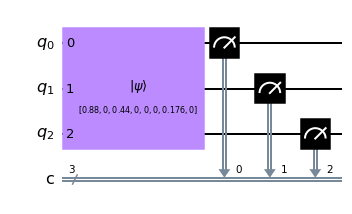

In [3]:
'''creamos un circuito e inicializamos el estado'''
qc = QuantumCircuit(qr,cr)
qc.initialize(e_init,qr)

'''y le añadimos una instrucción de medida'''
qc.measure(qr,cr)
#qc.measure(qr,reversed(list(cr)))
#qc.measure([qr[0],qr[1]],[cr[1],cr[2]])

qc.draw(output='mpl')

La manera de tener acceso a las amplitudes es midiendo repetidas veces para reconstruir la función de probabilidad

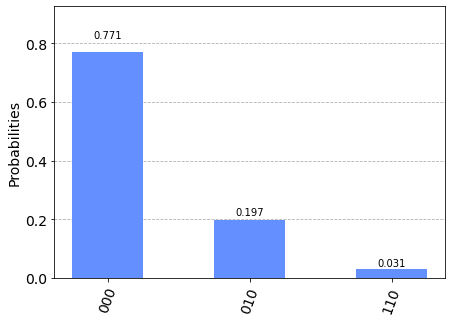

In [4]:
from qiskit import Aer, execute 
M_simulator = Aer.get_backend('qasm_simulator')

#execute
job=execute(qc,backend=M_simulator,shots=4096) # Hacemos la simulación 4096 veces )

'otra forma de obtener el "job" a partir de run, una función del qasm_simulator'
#qcobj = transpile(qc, M_simulator )      # Crea un objeto compilado a partir del circuito  
#job = M_simulator.run(qcobj, shots=4096) # Hacemos la simulación 4096 veces 

#resultado  
resultado=job.result()
#frecuencias
cuentas = resultado.get_counts()        

from qiskit.tools.visualization import plot_histogram
plot_histogram(cuentas) # Mostramos un histograma de resultados

Vamos a generar diccionarios con las probabilidades y la amplitudes de cada estado

In [5]:
def probs_amps(cuentas): # frecuencias_dict es un diccionario con la estadística de resultados
    
    prob_dict=cuentas.copy() # vamos a modificar el diccionario "cuentas" con las probabilidades 
    amp_dict=cuentas.copy()  # y las amplitudes
    keys = list(cuentas.keys())
    values = list(cuentas.values())
    
    N=sum(values)
    probabilidades = [v/N for v in values] # lista de frecuencias relativas
 
    for i in range(len(keys)):
        prob_dict[keys[i]]= probabilidades[i]
        amp_dict[keys[i]] = np.sqrt(probabilidades[i]) #las amplitudes, sólo en valor absoluto, las fases no son accesibles
    
    return  prob_dict, amp_dict

probs, amps = probs_amps(cuentas)

print("probabilidades =",probs )
print("amplitudes =", amps )

probabilidades = {'110': 0.031494140625, '010': 0.197265625, '000': 0.771240234375}
amplitudes = {'110': 0.17746588580625855, '010': 0.4441459501109967, '000': 0.8782028435247747}


<a id='basgen'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Medidas en bases generales</b>
</table>

Vamos a suponer que queremos medir en una base ortonormal arbitraria $\{\ket{ x}'\}$, $x=0,...,2^n-1$. Buscamos un circuito que, a la llegada de un vector  concreto de la base $\ket{x}'=\ket{a_{n-1}...a_0}'$, devuelva exactamente *la misma colección* de bits  $a_{n-1}...a_0$.

Vamos a suponer que conocemos el operador unitario que relaciona esta base con la  base computacional  

$$\ket{ x}'= U\ket{x}~~~~~~\Longrightarrow ~~~~~~   U^\dagger\ket{x}' = \ket{ x}  \, .$$



Entonces es evidente que sólo tenemos que añadir el operador $U^\dagger$ antes de usar el medidor estándar. 


<br>
<br>

<div>
<img src="images/Multimeter_basis.png" width="50%" style="margin:auto" />
</div>



## Medidas  de Pauli

En caso más frecuente consiste en medir diferentes cúbits en diferentes bases de Pauli, $X$, $Y$ ó $Z$.

En este caso, $U= R_1\otimes \ldots \otimes R_n$ es un producto de rotaciones locales. 

Esto sigue la misma pauta que se explicó para el caso de un sólo cúbit. Por ejemplo el siguiente circuito mide en la base $Z_0X_1Y_2$
<br>
<br>
<div>
<img src="images/XYZ_multimeter.png" width="25%" style="margin:auto"/>
</div>


Definamos una función que añade aparatos de medida en bases $X$, $Y$ ó $Z$ mediante un *string* como 'xxy' etc 


In [6]:
def add_Pauli_measurement(qc,paulistring):

    assert(qc.num_qubits==len(paulistring))

    for i,basis in enumerate(paulistring):
        if  basis == 'X':
            qc.h(i)    
            qc.measure(i, i)
        elif basis == 'Z':
            qc.measure(i, i)
            pass    
        elif basis == 'Y':
            qc.sdg(i)
            qc.h(i)
            qc.measure(i, i)

    return qc 

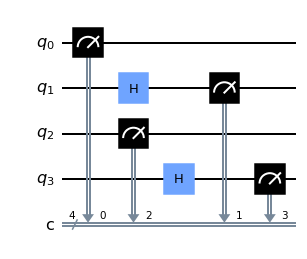

In [7]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(4,4)
add_Pauli_measurement(qc,'ZXZX')  # probar a cambiar el aparato de medida
qc.draw('mpl')

Sin embargo ahora podemos hacer cambios de base globales $U:\ket{x}\to \ket{x}'$

## Medida de Bell

El circuito 

<div>
<img src="images/Bell_basis.png" width="20%" style="margin:auto"/>
</div>

<br>

 genera la <i>base de Bell</i> $\ket{B_{xy}} = \ket{xy}'  = U \ket{xy}$ a partir de la <i>base computacional</i> $\{\ket{xy}\}$ 
 <br>
<br>

\begin{array}{rcl}
\ket{B_{00}} &=& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) \\
\ket{B_{01}} &=& \frac{1}{\sqrt{2}} \big( \ket{01} + \ket{10} \big) \\
\ket{B_{10}} &=& \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) \\
\ket{B_{11}} &=& \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{10} \big) \\
\end{array}




Por tanto, el circuito que efectúa una **medida de Bell**  utiliza la puerta $U^\dagger$ antes del medidor 

<br>
<br>


<div>
<img src="images/Bell_meter.png" width="35%" style="margin:auto"/>
</div>


In [8]:
def add_Bell_measurement(qc):  
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])

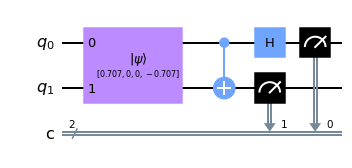

In [9]:
from qiskit import QuantumCircuit

# creamos el circuito
qc = QuantumCircuit(2,2)

# definimos la base de Bell
B00 = np.array([1,0,0,1]/np.sqrt(2))
B01 = np.array([1,0,0,-1]/np.sqrt(2))
B10 = np.array([0,1,1,0]/np.sqrt(2))
B11 = np.array([0,1,-1,0]/np.sqrt(2))

# inicializamos el estado de entrada en cualquiera de los estados anteriores
qc.initialize(B01,[0,1])

# añadimos el medidor en la base de Bell
add_Bell_measurement(qc)
qc.draw('mpl')

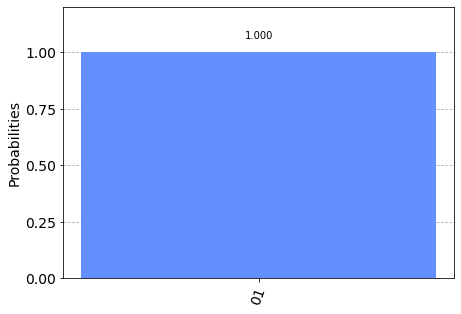

In [10]:
from qiskit import Aer, execute

M_simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram

result=execute(qc,backend=M_simulator).result()
counts=result.get_counts()
plot_histogram(counts)

<a id='valesp'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Valores esperados</b>
</table>

Para calcular el valor esperado de un observable genérico $A\in {\rm L}(H^{\otimes n})$ debemos expandirlo en una base de *cadenas de Pauli*


$$
A = \sum_{i_1,...,i_n=0}^3 a_{i_1\ldots i_n} \sigma_{i_1}\otimes \ldots \otimes \sigma_{i_n}
$$

donde $\sigma_i = (I,X,Y,Z)$


Por ejemplo, con $n=4$ 
$$
\sigma_1\otimes \sigma_2\otimes \sigma_0 \otimes \sigma_3 = XYIZ
$$

los coeficientes se pueden obtener haciendo las trazas

$$
a_{i_1\ldots i_n} =\frac{1}{2^n} \tr (A \,  \sigma_{i_1}\otimes \ldots  \otimes\sigma_{i_n})
$$



Por tanto sólo tenemos que averiguar los valores esperados de cadenas de Pauli

$$
\langle A \rangle_{\psi} =  \sum_{i_1,...,i_n=0}^3 a_{i_1\ldots i_n} \langle \sigma_{i_1}\otimes \ldots   \otimes\sigma_{i_n}\rangle
$$

Veamos cómo calcular el valor esperado del operador

$$
\langle Z\otimes Z\otimes Z\rangle_\Psi  = \bra{\Psi}   Z\otimes Z\otimes Z \ket{\Psi}
$$

en el siguiente estado

$$
|\psi> = \frac{i}{4}|000>+\frac{1}{\sqrt{8}}|001>+\frac{1+i}{4}|010>+\frac{1+2i}{\sqrt{8}}|101>+\frac{1}{4}|110>
$$


Primero lo inicializamos

In [24]:
np.random.rand(3) + 1J*np.random.rand(3)

array([0.42301656+0.68245611j, 0.70102564+0.51970304j,
       0.60865738+0.46480988j])

In [9]:
from qiskit import *
import numpy as np
from qiskit.quantum_info import Statevector

# inicialicemos un estado de 3 cúbits, es decir 2^3 = 8 componentes 

#input_vector = [1,0,0,0,0,0,0,1]
#input_vector = [1/4*1J,1/np.sqrt(8)*(1+0J),1/4*(1+1J),0,0,1/np.sqrt(8)*(1+2J),1/4,0]

input_vector = np.random.rand(8) + 1J*np.random.rand(8)

# que normalizaremos a la unidad si es que no lo está ya
input_vector/=np.linalg.norm(input_vector)
print('norma=',np.linalg.norm(input_vector))

Statevector(input_vector).draw('latex')

norma= 0.9999999999999998


<IPython.core.display.Latex object>

Dado que $Z\ket{a} = (-1)^a\ket{a}$ donde $a=0,1$, entonces tendremos que, sobre un estado $\ket{abc}$ de la base computacional

$$
Z\otimes Z\otimes Z \ket{abc} = Z\ket{a}\otimes Z\ket{b}\otimes Z\ket{c} = (-1)^{a+b+c}\ket{abc}
$$


entonces el valor esperado  de este operador es
\begin{eqnarray}
\langle Z\otimes Z\otimes Z\rangle_\Psi &=&
\sum_{a,b,c=0,1} (-1)^{a+b+c} P(a,b,c) \nonumber\\ \rule{0mm}{10mm}
&=& \sum_{a,b,c=0,1}(-1)^{a+b+c}\big|\bra{abc}\Psi\rangle\big|^2 
\end{eqnarray}

El circuito que calcula las probabilidades necesarias es el siguiente

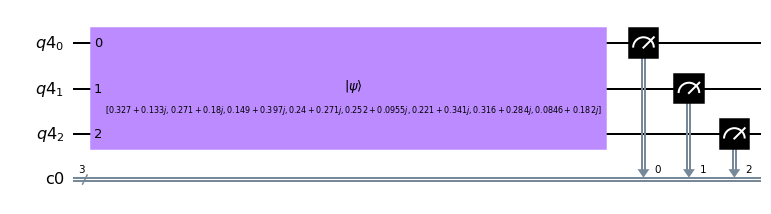

In [10]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc_Pauli = QuantumCircuit(qr,cr)

from qiskit.extensions import Initialize

'initialize the circuit in the input_vector'
qc_Pauli.initialize(input_vector, qr)
qc_Pauli.draw(output='mpl')
qc_Pauli.measure(qr,cr)
qc_Pauli.draw(output='mpl')

Ejecutamos el circuito un número de veces

{'010': 179422, '111': 40511, '110': 180109, '001': 106379, '011': 131571, '000': 124789, '101': 165178, '100': 72041}


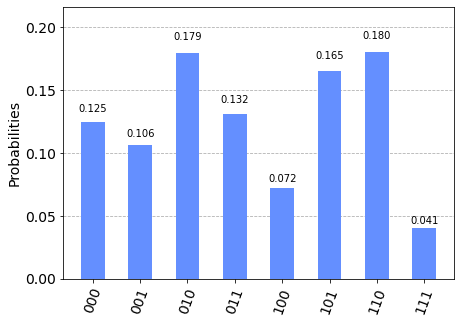

In [11]:
M_backend = BasicAer.get_backend('qasm_simulator')
shots=1000000

cuentas_ZZZ = execute(qc_Pauli,M_backend,shots=shots).result().get_counts()
print(cuentas_ZZZ)

from qiskit.tools.visualization import plot_histogram
plot_histogram(cuentas_ZZZ)

Definimos una función que calcula el valor medio y la sigma de una distribución de probabilidad

In [12]:
def val_esp_sigma(cuentas):
    probs, amps = probs_amps(cuentas)
#    print(probs)

    media = 0
    varianza = 0

    for bitstring,  prob  in probs.items():
        media += (-1)**(sum([int(bit) for bit in bitstring])) * prob 

    for bitstring,  prob  in probs.items():
        varianza += ((-1)**(sum([int(bit) for bit in bitstring]))-media)**2 * prob 
    
    sigma = np.round(np.sqrt(varianza),5)
    
    return media, sigma

In [13]:
valor_esperado, sigma = val_esp_sigma(cuentas_ZZZ)

print('<ZZZ> = ', np.round(valor_esperado,5), ' sigma= ', sigma)


<ZZZ> =  0.20329  sigma=  0.97912


<div class='alert alert-block alert-success'>
    <b>Ejercicio:</b> 
calcula el valor esperado de $\langle X\otimes Y\otimes Z\rangle_\Psi$    
</div>

<div class="alert alert-block alert-success">
 <b>Ejercicio:</b>  considera el hamiltoniano $H=A(X X+Y Y+Z Z)$ siendo $A=1.47\cdot 10^{-6}eV$. 
 Calcular el valor esperado de la energía $E = \langle H\rangle_\Psi$  en los cuatro estados de Bell
$\ket{\Psi} = \ket{B_{ij}}$. 
<div>


<a id='medHad'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Medida de Hadamard</b>
</table>

Al final, el valor esperado de un operador es un simple número que se obtiene a partir de una distribución aleatoria de valores. 

¿No podríamos diseñar una variable aleatoria cuyo valor medio coincida con ese resultado? 

La medida de Hadamard hace precisamente esto aprovechando el entrelazamiento 



Consideremos el siguiente circuito
<br>
<br>
<div>
<img src="images/Hadamard_measure.png" width="30%" style="margin:auto"/>
</div>


El aparato de medida sólo registra valores $\{0,1\}$ como resultado de las medidas proyectivas sobre $\ket{\pm}$

Supongamos que medimos con el aparato $x$. El promedio 

$$
p_{0}-p_{1} = \frac{n_{0}}{N} - \frac{n_{1}}{N} = \langle X\rangle_{ancilla}
$$

es el valor esperado de $X$ en la ancilla. 


Análogamente, será $\langle Y\rangle_{ancilla}$  si usamos el aparato $y$. 

Vamos a demostrar el siguiente resultado que relaciona este número con el valor esperado de $U$ en el estado $\ket{\psi}$


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Teorema:</b>
<br>
$$
\langle X\rangle_{ancilla} = {\rm Re} \langle U\rangle_{\psi} ~~~,~~~ \langle Y\rangle_{ancilla} = {\rm Im} \langle U\rangle_{\psi}\, 
$$
</div>
<br>


**Demostración**: para el caso $x$, el circuito anterior será
<br>
<br>
<div>
<img src="images/Hadamard_measurea.png" width="40%" style="margin:auto"/>
</div>
<br>


Un cálculo explícito nos da el estado que llega al aparato de medida
<br>

$$
\ket{0}\ket{\psi} ~\to ~ \ket{\Psi} = \frac{1}{2} \left[\rule{0mm}{3mm} |0\rangle \otimes (1 + U) |\psi\rangle +  |1\rangle \otimes (1 - U) |\psi\rangle \right] \label{hadam}
$$


Si medimos el cúbit ancilla, obtendremos como resultados $\{0,1\}$ con probabilidades 

\begin{eqnarray} 
 p_{0}  &=&  \left\vert \frac{1}{2}  (1 + U) \ket{\psi}  \right\vert^{2} = 
 \frac{1}{4}\bra{\psi}(1 + U^\dagger) (1 + U) \ket{\psi} =\frac{1}{2}(1+\operatorname{Re}\langle \psi|U|\psi\rangle) \nonumber\\
 p_{1}  &=&  \left\vert \frac{1}{2}  (1 - U) \ket{\psi}  \right\vert^{2}=
 \frac{1}{4}\bra{\psi}(1 - U^\dagger) (1 - U) \ket{\psi} =
 \frac{1}{2}(1-\operatorname{Re}\langle \psi|U|\psi\rangle) \nonumber
\end{eqnarray}


El número $ p_{0} - p_{1}$ es el valor esperado de $\langle X\rangle $ en el estado de la ancilla justo  antes de la barrera. Encontramos el siguiente resultado 
$$
\langle{X}\rangle_{ancilla}  =  \hbox{Re}\bra{\psi} U \ket{\psi}
$$


Supongamos ahora que medimos en la base $Y$, es decir, con el circuito siguiente

<br>
<br>
<div>
<img src="images/Hadamard_measureb.png" width="45%" style="margin:auto"/>
</div>


<div class="alert alert-block alert-success">
    <b>Ejercicio:</b> 
verificar que la parte imaginaria viene de medir  $\langle Y\rangle$ en la ancilla

$$
\langle{Y}\rangle_{ancilla}  =  \hbox{Im}\bra{\psi} U \ket{\psi} \, .
$$
</div>

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b> 
Obtener el valor esperado de $\langle Z\otimes Z\otimes Z\rangle_\Psi$ en el estado 

$$
|\psi> = \frac{i}{4}|000>+\frac{1}{\sqrt{8}}|001>+\frac{1+i}{4}|010>+\frac{1+2i}{\sqrt{8}}|101>+\frac{1}{4}|110>
$$

usando el método de Hadamard.
</div>

Generamos el circuito de medida de Hadamard

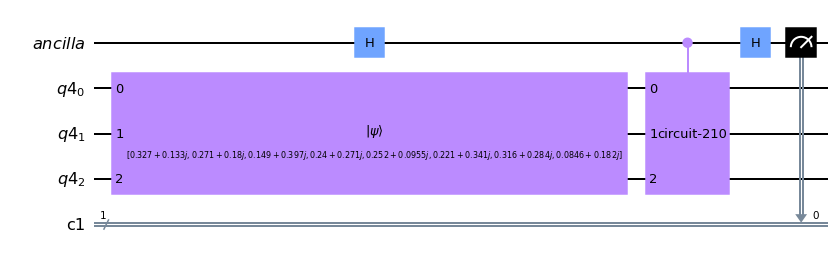

In [15]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

qr_Had = QuantumRegister(3, name = 'qr')
qra = QuantumRegister(1, name = 'ancilla')
cr = ClassicalRegister(1)

'creamos el operador como una puerta "gate" que admite el método "control'
qc0 = QuantumCircuit(qr)
qc0.z(qr)
CZZZ_gate = qc0.to_gate().control(1,ctrl_state= 1) 

'creamos el circuito con el operador controlado'
qc_Had = QuantumCircuit(qra,qr,cr)
qc_Had.initialize(input_vector,qr)
qc_Had.h(qra)  
qc_Had.append(CZZZ_gate,qra[:] + qr[:])
qc_Had.h(qra)
qc_Had.measure(qra,cr)

qc_Had.draw('mpl')

Ejecutamos y obtenemos el valor esperado

{'1': 398641, '0': 601359}


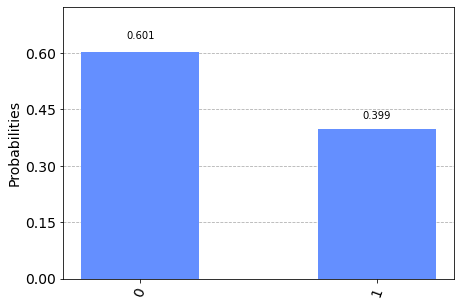

In [16]:
M_backend = BasicAer.get_backend('qasm_simulator')
shots=1000000

cuentas_Had= execute(qc_Had,M_backend,shots=shots).result().get_counts()
print(cuentas_Had)

from qiskit.tools.visualization import plot_histogram
plot_histogram(cuentas_Had)

In [17]:
val_esp_sigma(cuentas_Had)

(0.20271799999999995, 0.97924)

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b> 
define una función <i>add_Hadamadar_measure</i> que reciba un circuito y una  cadena de Pauli y añada al circuito el medidor de Hadamard asociado.
</div>